## 时间序列练习。注意：模型有好有坏，不必介意，重要的是掌握过程

## 第一步 从tushare中任意获取一股票，并做数据规范化处理

## 第二步 计算股票的收益率，并绘制收益率时间序列图 

## 第三步 对股票收益率序列进行ADF检验，并判断序列是否平稳

## 第四步 绘制收益率ACF和PACF图，并做LB检验判断是否为白噪声序列

## 第五步 用st.arma_order_select_ic函数确定ARIMA模型P,Q参数，对模型进行拟合

## 第六步 用模型对八期数据进行预测，并与实际数据进行比较

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


D:\anaconda\conda\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
D:\anaconda\conda\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
D:\anaconda\conda\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


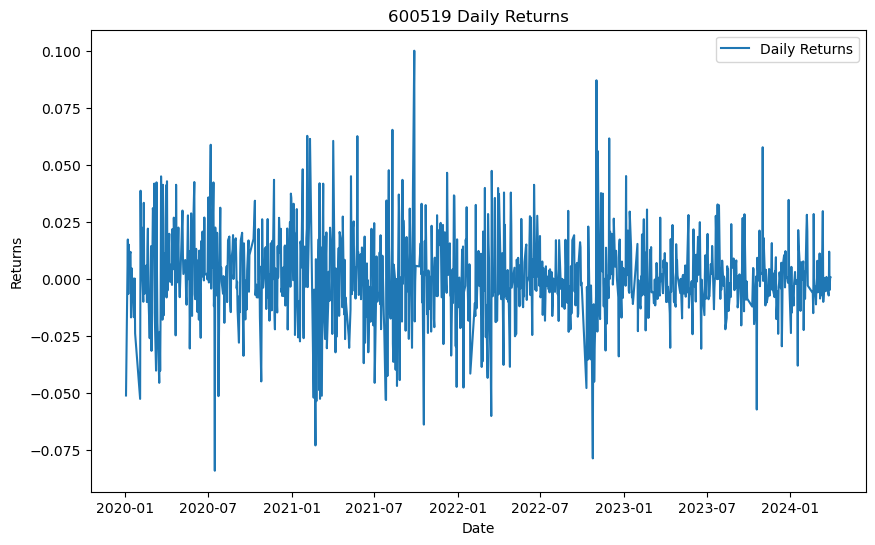

ADF Statistic: -32.414966115157235
p-value: 0.0
Is the returns series stationary? True


D:\anaconda\conda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


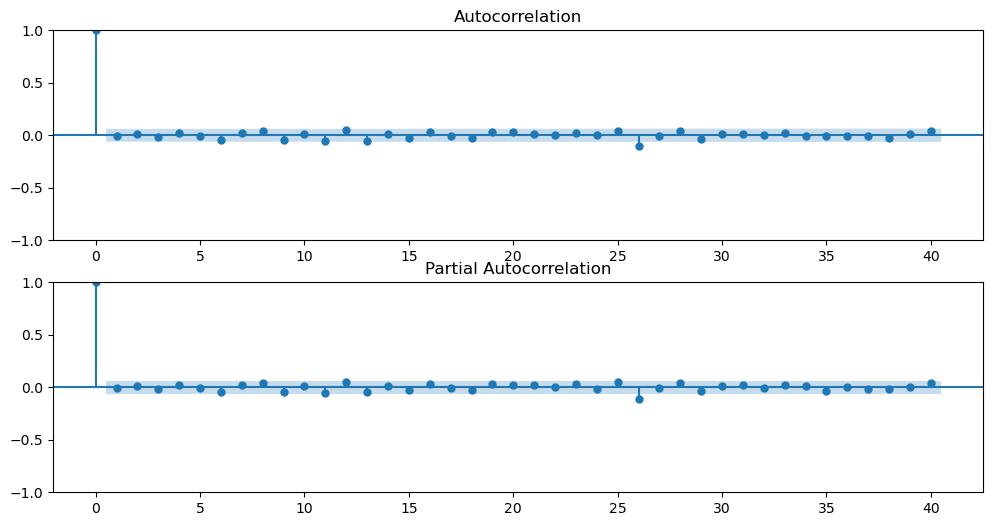

LB Statistic: lb_stat
p-value: lb_pvalue


D:\anaconda\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda\conda\

Predicted means:
 1027    0.0007
1028    0.0007
1029    0.0007
1030    0.0007
1031    0.0007
1032    0.0007
1033    0.0007
1034    0.0007
Name: predicted_mean, dtype: float64
Confidence intervals:
       lower returns  upper returns
1027      -0.037638       0.039038
1028      -0.037640       0.039040
1029      -0.037640       0.039040
1030      -0.037640       0.039040
1031      -0.037640       0.039040
1032      -0.037640       0.039040
1033      -0.037640       0.039040
1034      -0.037640       0.039040


D:\anaconda\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


# 设置Tushare Pro的API令牌
ts.set_token('d5c78fbfa31bc713842d154cc6edcfb0d03c4a2178e0568a67119d94')

# 初始化Tushare Pro接口
pro = ts.pro_api()

# 获取股票数据
stock_code = '600519'  # 以贵州茅台（股票代码：600519）为例
start_date = '2020-01-01'
end_date = '2024-03-31'
df = ts.get_k_data(stock_code, start=start_date, end=end_date)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 计算收益率
df['returns'] = df['close'].pct_change()

# 绘制收益率时间序列图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['returns'], label='Daily Returns')
plt.title(f'{stock_code} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# ADF检验
result = adfuller(df['returns'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Is the returns series stationary?', result[1] < 0.05)

# 绘制ACF和PACF图
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['returns'].dropna(), lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['returns'].dropna(), lags=40, ax=plt.gca())
plt.show()

# LB检验
lb_stat, lb_p_value = acorr_ljungbox(df['returns'].dropna(), lags=20)
print(f'LB Statistic: {lb_stat}')
print(f'p-value: {lb_p_value}')


# 确定ARIMA模型参数并拟合
model = ARIMA(df['returns'].dropna(), order=(1, 0, 1))
results = model.fit()

# 预测未来8天的收益率
forecast = results.get_forecast(steps=8)
predicted_means = forecast.predicted_mean
predicted_conf_int = forecast.conf_int()

# 打印预测结果
print('Predicted means:\n', predicted_means)
print('Confidence intervals:\n', predicted_conf_int)

